In [1]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [2]:
rnd=np.random.RandomState(seed=42)

In [3]:
n_data=16
a_true=1.255
b_true=4.507
x=rnd.uniform(0,2.0,n_data)
print(x)

[0.74908024 1.90142861 1.46398788 1.19731697 0.31203728 0.31198904
 0.11616722 1.73235229 1.20223002 1.41614516 0.04116899 1.9398197
 1.66488528 0.42467822 0.36364993 0.36680902]


In [4]:
x.sort()

In [21]:
y=a_true*x+b_true
y_err=5*rnd.uniform(0.1,0.2,size=n_data)
def line_model(pars,x):
    return pars[0]*np.array(x)+pars[1]
def weighted_absolute_deviation(pars,x,y,y_err):
    chi=(y-line_model(pars,x))/y_err
    return np.sum(np.abs(chi))
def weighted_square_deviation(pars,x,y,y_err):
    chi=(y-line_model(pars,x))/y_err
    return np.sum(np.abs(chi**2))

In [25]:
x0 = [1., 1.] # starting guess for the optimizer 

result_abs = minimize(weighted_absolute_deviation, x0=x0,args=(x, y, y_err),method='BFGS') 

result_sq = minimize(weighted_square_deviation, x0=x0,args=(x, y, y_err),method='BFGS')
best_pars_abs = result_abs.x
best_pars_sq = result_sq.x

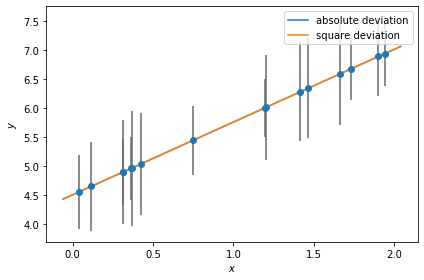

In [27]:
datastyle=dict(linestyle='none',marker='o',color='r',ecolor='k')
x_grid=np.linspace(x.min()-.1,x.max()+.1,128)
plt.errorbar(x,y,y_err,linestyle='none',marker='o',ecolor='#666666')
plt.plot(x_grid, line_model(best_pars_abs, x_grid),marker='', linestyle='-', label='absolute deviation')
plt.plot(x_grid,line_model(best_pars_abs,x_grid),marker='',linestyle='-',label='square deviation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.tight_layout()